<a href="https://colab.research.google.com/github/AHMEDMEDHAT0408/trying/blob/main/Titanic%20ship%20task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import used libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
# read the csv files and store it as a dataframe
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
# testing/Display the first 5 rows of the dataframe
train_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


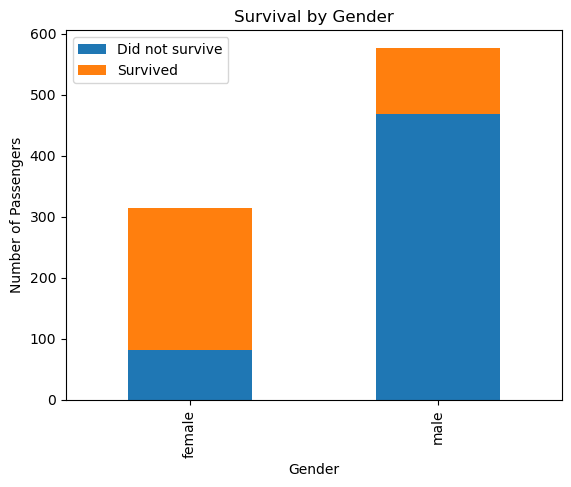

In [ ]:
# matPlotlibing survival count by gender aka proofing sexism
survival_by_gender = train_df.groupby('Sex')['Survived'].value_counts().unstack()
survival_by_gender.plot(kind='bar', stacked=True)
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.legend(['Did not survive', 'Survived'])
plt.show()


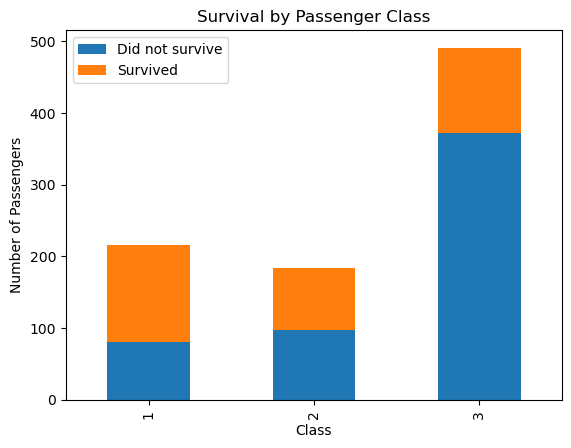

In [ ]:
# matPlotlibing survival count by passenger class aka proofing social injustice
survival_by_class = train_df.groupby('Pclass')['Survived'].value_counts().unstack()
survival_by_class.plot(kind='bar', stacked=True)
plt.title('Survival by Passenger Class')
plt.xlabel('Class')
plt.ylabel('Number of Passengers')
plt.legend(['Did not survive', 'Survived'])
plt.show()


In [ ]:
# Checking for missing values in train dataframe
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Checking for missing values in test dataframe
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
#completing the missing data
median = SimpleImputer(strategy='median')
train_df['Age'] = median.fit_transform(train_df[['Age']])
test_df['Age'] = median.transform(test_df[['Age']])


In [ ]:
# Checking for missing values in train dataframe
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Checking for missing values in test dataframe
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# Droping the Cabin because too many missing values
train_df = train_df.drop(columns='Cabin')
test_df = test_df.drop(columns='Cabin')

In [ ]:
# Checking for missing values in test dataframe
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [ ]:
# Checking for missing values in train dataframe
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
#filling the missing fare with the median fare and filling the missing emarked with the most frequent emarked
test_df['Fare'] = median.fit_transform(test_df[['Fare']])
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

In [ ]:
# Checking for missing values in train dataframe
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
# Checking for missing values in test dataframe
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
# Define features and labels
X = train_df.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket'])
y = train_df['Survived']

# Test data (Note: No 'Survived' column in the test set)
X_test = test_df.drop(columns=['PassengerId', 'Name', 'Ticket'])

# Split the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Convert categorical variables in the training and validation sets
X_train_encoded = pd.get_dummies(X_train)
X_val_encoded = pd.get_dummies(X_val)

# Ensure both sets have the same columns
X_val_encoded = X_val_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Train Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_encoded, y_train)

# Predict on validation set
y_pred_logreg = logreg.predict(X_val_encoded)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_logreg)
precision = precision_score(y_val, y_pred_logreg)
recall = recall_score(y_val, y_pred_logreg)
f1 = f1_score(y_val, y_pred_logreg)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888


In [ ]:
# Train Random Forest Classifier using the encoded data
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_encoded, y_train)

# Predict on validation set using the encoded validation data
y_pred_rf = rf.predict(X_val_encoded)

# Model evaluation
accuracy_rf = accuracy_score(y_val, y_pred_rf)
precision_rf = precision_score(y_val, y_pred_rf)
recall_rf = recall_score(y_val, y_pred_rf)
f1_rf = f1_score(y_val, y_pred_rf)

print(f"Random Forest - Accuracy: {accuracy_rf}, Precision: {precision_rf}, Recall: {recall_rf}, F1-score: {f1_rf}")


Random Forest - Accuracy: 0.8212290502793296, Precision: 0.7837837837837838, Recall: 0.7837837837837838, F1-score: 0.7837837837837838


In [ ]:
# Confusion matrix and classification report for Logistic Regression
print(confusion_matrix(y_val, y_pred_logreg))
print(classification_report(y_val, y_pred_logreg))

# Confusion matrix and classification report for Random Forest
print(confusion_matrix(y_val, y_pred_rf))
print(classification_report(y_val, y_pred_rf))


[[90 15]
 [19 55]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

[[89 16]
 [16 58]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       105
           1       0.78      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179



In [ ]:
# Encode the test set using the same method as the training set
X_test_encoded = pd.get_dummies(X_test)

# Ensure the test set has the same columns as the training set
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Predict survival for the test set
test_predictions = rf.predict(X_test_encoded)

# Create results DataFrame
results = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_predictions
})

# Save results to a CSV file
results.to_csv('results.csv', index=False)
